In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
vehicle_id STRING 车辆唯一标志码
time INT 时间
state INT 车辆状态（1 代表启动，2 代表熄火，3 代表其他）
GPS_lat FLOAT 纬度
GPS_lon FLOAT 经度

SUM = 5332862
    1          2          sum
v1  0         0          267664
v2  0         0          387270
v3  0         0          719046
v4  75594     47521      123115
v5  77887     54274      132161
v6  0         0          448535
v7  289265    1630       290896
v8  437183    64308      501492
v9  464303    31954      496257
v10 385879    214029     599910
v11 316713    363277     679993
v12 462200    224323     686523
"""

data = pd.read_csv('决赛数据/track_data.csv')
data.head()

,time,state,GPS_lon,GPS_lat,vehicle_id
0,20170501000007,NaN,117.107140,40.158837,1
1,20170501000017,NaN,117.107145,40.158855,1
2,20170501000027,NaN,117.107136,40.158874,1
3,20170501000037,NaN,117.107121,40.158883,1
4,20170501000047,NaN,117.107094,40.158886,1


In [2]:
# 筛选车辆
v1 = data[(data.vehicle_id == 1)].copy()
v2 = data[(data.vehicle_id == 2)].copy()
v3 = data[(data.vehicle_id == 3)].copy()
v4 = data[(data.vehicle_id == 4)].copy()
v5 = data[(data.vehicle_id == 5)].copy()
v6 = data[(data.vehicle_id == 6)].copy()
v7 = data[(data.vehicle_id == 7)].copy()
v8 = data[(data.vehicle_id == 8)].copy()
v9 = data[(data.vehicle_id == 9)].copy()
v10 = data[(data.vehicle_id == 10)].copy()
v11 = data[(data.vehicle_id == 11)].copy()
v12 = data[(data.vehicle_id == 12)].copy()

In [3]:
# 筛选状态 TODO 状态不一定正确
# v4 = v4[v4.state == 1]
# v5 = v5[v5.state == 1]
# v7 = v7[v7.state == 1]
# v8 = v8[v8.state == 1]
# v9 = v9[v9.state == 1]
# v10 = v10[v10.state == 1]
# v11 = v11[v11.state == 1]
# v12 = v12[v12.state == 1]

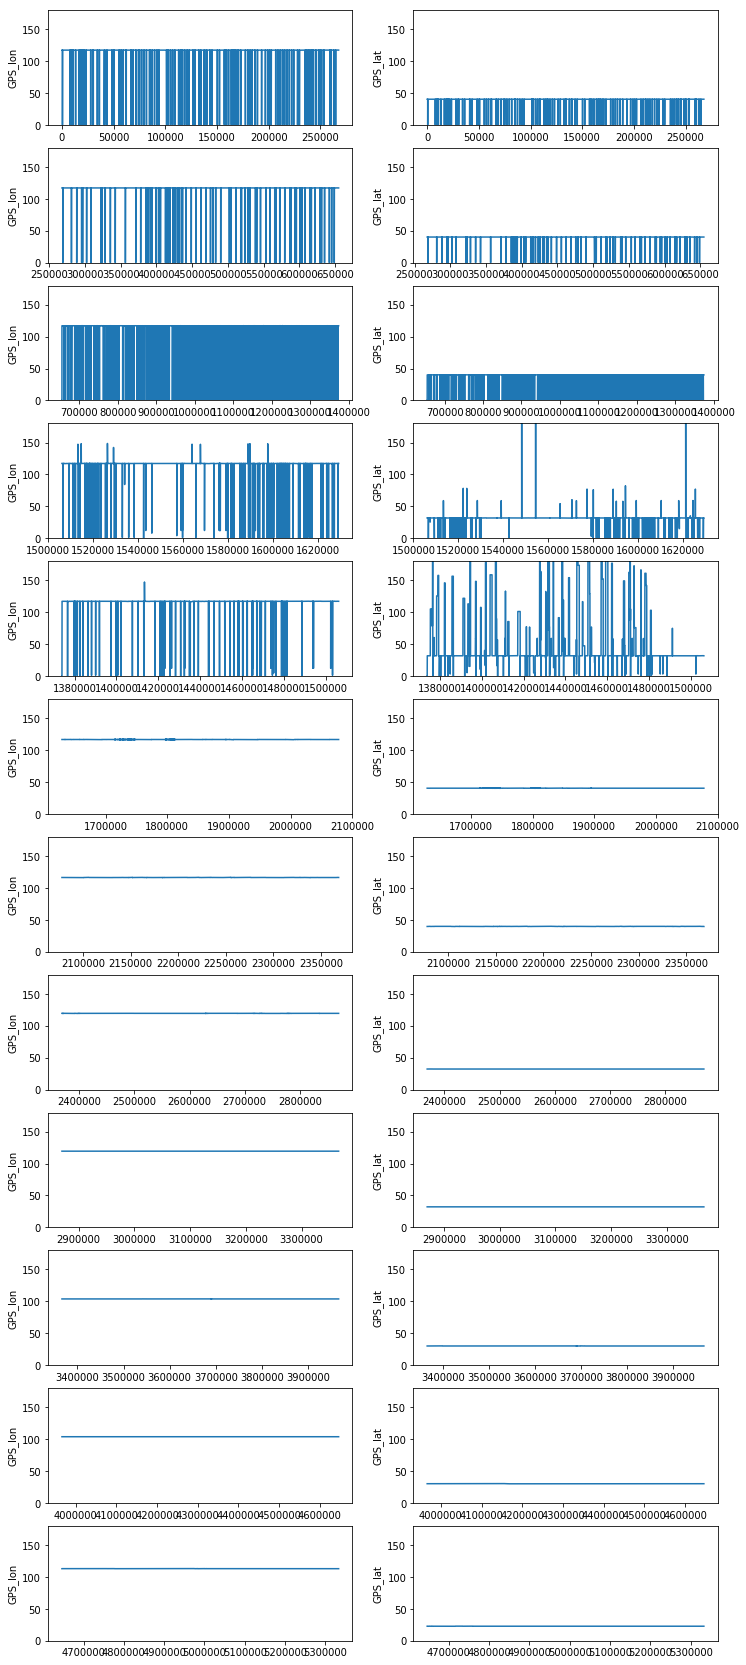

In [4]:
plt.figure(figsize = (12, 30))

for i, v in enumerate([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12]):
    plt.subplot(12, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(12, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

In [5]:
# 筛选经纬
"""
v1: lon (116,118) lat (40,41)
v2: lon (116,118) lat (40,41)
v3: lon (116,118) lat (39,41)
v4: lon (116,118) lat (35,36)
v5: lon (116,118) lat (31,32)
"""

v1.loc[(v1.GPS_lon < 116) | (v1.GPS_lon > 118), 'GPS_lon'] = np.nan
v1.loc[(v1.GPS_lat < 40) | (v1.GPS_lat > 41), 'GPS_lat'] = np.nan

v2.loc[(v2.GPS_lon < 116) | (v2.GPS_lon > 118), 'GPS_lon'] = np.nan
v2.loc[(v2.GPS_lat < 40) | (v2.GPS_lat > 41), 'GPS_lat'] = np.nan

v3.loc[(v3.GPS_lon < 116) | (v3.GPS_lon > 118), 'GPS_lon'] = np.nan
v3.loc[(v3.GPS_lat < 39) | (v3.GPS_lat > 41), 'GPS_lat'] = np.nan

v4.loc[(v4.GPS_lon < 116) | (v4.GPS_lon > 118), 'GPS_lon'] = np.nan
v4.loc[(v4.GPS_lat < 35) | (v4.GPS_lat > 36), 'GPS_lat'] = np.nan

v5.loc[(v5.GPS_lon < 116) | (v5.GPS_lon > 118), 'GPS_lon'] = np.nan
v5.loc[(v5.GPS_lat < 31) | (v5.GPS_lat > 32), 'GPS_lat'] = np.nan

In [6]:
# 插值填充
v1['GPS_lon'] = v1['GPS_lon'].interpolate()
v1['GPS_lat'] = v1['GPS_lat'].interpolate()

v2['GPS_lon'] = v2['GPS_lon'].interpolate()
v2['GPS_lat'] = v2['GPS_lat'].interpolate()

v3['GPS_lon'] = v3['GPS_lon'].interpolate()
v3['GPS_lat'] = v3['GPS_lat'].interpolate()

v4['GPS_lon'] = v4['GPS_lon'].interpolate()
v4['GPS_lat'] = v4['GPS_lat'].interpolate()

v5['GPS_lon'] = v5['GPS_lon'].interpolate()
v5['GPS_lat'] = v5['GPS_lat'].interpolate()

In [7]:
v1 = v1.dropna(subset=['GPS_lon', 'GPS_lat'])
v2 = v2.dropna(subset=['GPS_lon', 'GPS_lat'])
v3 = v3.dropna(subset=['GPS_lon', 'GPS_lat'])
v4 = v4.dropna(subset=['GPS_lon', 'GPS_lat'])
v5 = v5.dropna(subset=['GPS_lon', 'GPS_lat'])
v6 = v6.dropna(subset=['GPS_lon', 'GPS_lat'])
v7 = v7.dropna(subset=['GPS_lon', 'GPS_lat'])
v8 = v8.dropna(subset=['GPS_lon', 'GPS_lat'])
v9 = v9.dropna(subset=['GPS_lon', 'GPS_lat'])
v10 = v10.dropna(subset=['GPS_lon', 'GPS_lat'])
v11 = v11.dropna(subset=['GPS_lon', 'GPS_lat'])
v12 = v12.dropna(subset=['GPS_lon', 'GPS_lat'])

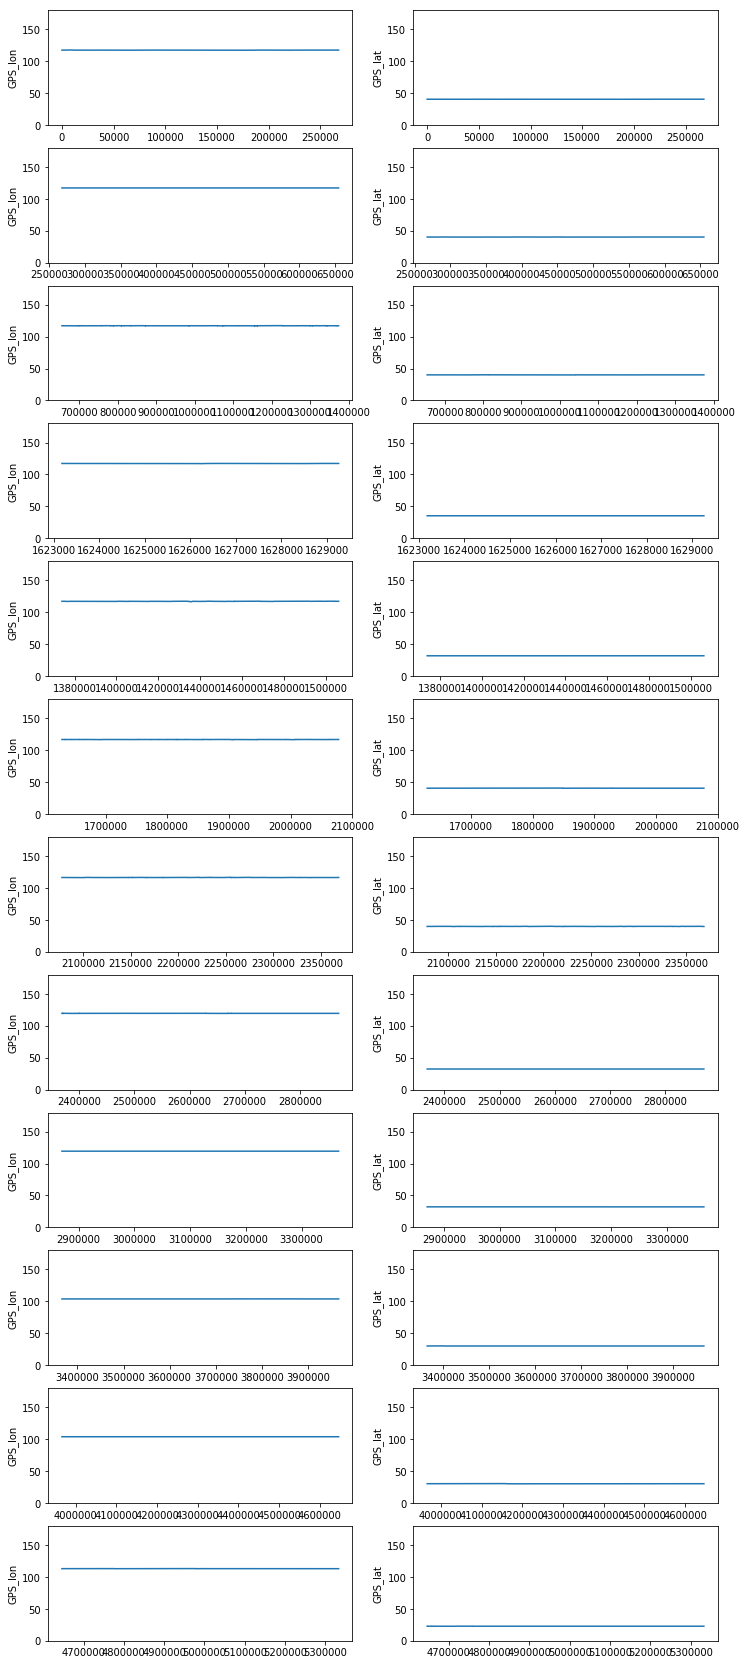

In [8]:
plt.figure(figsize = (12, 30))

for i, v in enumerate([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12]):
    plt.subplot(12, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(12, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

# 轨迹计算

In [9]:
from math import *

def distance(lon1, lat1, lon2, lat2):
    # 地球平均半径
    R = 6371.0
    
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [10]:
y = []

for v in [v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12]:
    d = 0
    for i in range(len(v) - 1):
        lon1 = v.iloc[i]['GPS_lon']
        lat1 = v.iloc[i]['GPS_lat']
        lon2 = v.iloc[i+1]['GPS_lon']
        lat2 = v.iloc[i+1]['GPS_lat']
        d += distance(lon1, lat1, lon2, lat2)
    y.append(d)

y

[8758.683074774934,
 10062.505643176542,
 21575.0692192509,
 502.4487961879522,
 16443.300540362783,
 22716.447147717783,
 22370.655930081077,
 27262.722738636323,
 26919.85978530851,
 26800.360188154347,
 24723.479003994908,
 30691.939128607664]

In [12]:
df = pd.DataFrame({'vehicle_id': [1,2,3,4,5,6,7,8,9,10,11,12], 'track_mileage': y})
df = df[['vehicle_id', 'track_mileage']]
df.to_csv('./track-submit_张彬城_暨南大学_15521106350_20181102.csv', index=False)

![title](../pdf/1.png)